In [21]:
from helper_code import *
import numpy as np, scipy as sp, scipy.stats, os, sys, joblib

In [22]:
import librosa
from matplotlib import pyplot as plt
import librosa.display
import numpy as np
from PIL import Image
import torch.utils.data as data
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

path='training_data'
for file in os.listdir(path=path):
    if file.endswith(".wav"):
        # print(file)
        y, sr = librosa.load(os.path.join(path, file), sr=4000)
        break
        # if sr != 22050:
        print('current audio sampling rate', sr)

In [23]:
print("audio duration: ", librosa.get_duration(y=y, sr = sr))

audio duration:  21.296


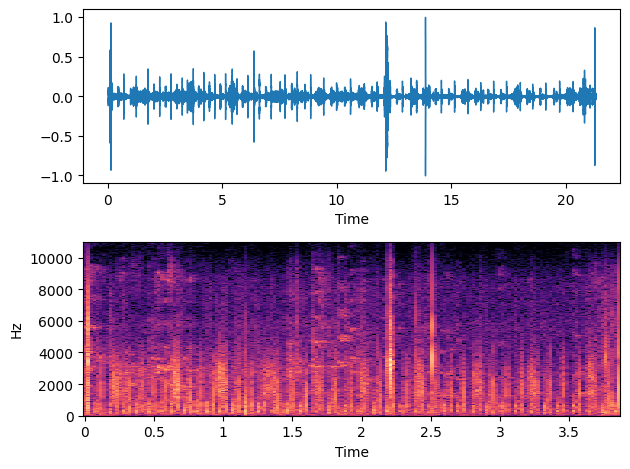

In [24]:
D = librosa.stft(y, hop_length=512, win_length = 1000)   #stft of y
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

fig, ax = plt.subplots(nrows = 2)

librosa.display.waveshow(y, sr=sr, ax = ax[0])
img = librosa.display.specshow(S_db,  x_axis='time', y_axis = 'linear', ax = ax[1])
# ax[1].set(title = 'Linear Spectogram')
# fig.colorbar(img, ax=ax[1], format = "%+2.f dB")
fig.tight_layout()

plt.show()

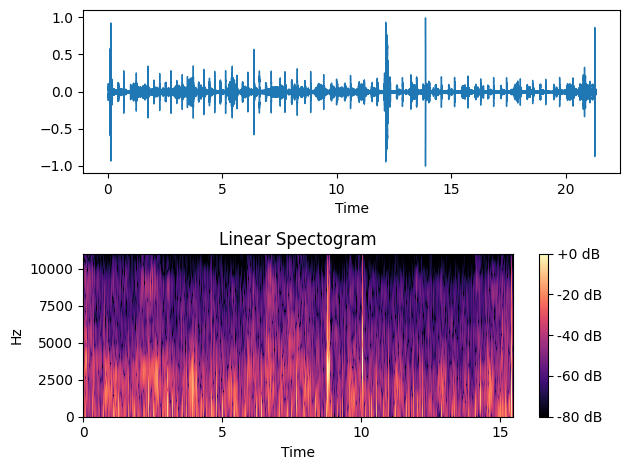

In [25]:
D = librosa.stft(y, hop_length=16, win_length = 32)   #stft of y
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

fig, ax = plt.subplots(nrows = 2)

librosa.display.waveshow(y, sr=sr, ax = ax[0])
img = librosa.display.specshow(S_db, hop_length=64, x_axis='time', y_axis = 'linear', ax = ax[1])
ax[1].set(title = 'Linear Spectogram')
fig.colorbar(img, ax=ax[1], format = "%+2.f dB")
fig.tight_layout()

plt.show()

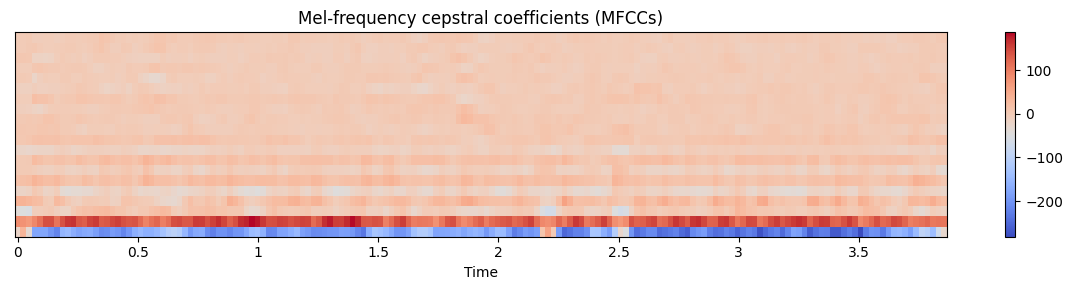

In [26]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

In [27]:
import matplotlib.pyplot as plt
import librosa.display

import numpy as np
import pandas as pd
import librosa

In [28]:
def create_spectrogram_image(file):
    ## Create STFT spectrum and save it
    # filename = librosa.util.example_audio_file()
    y, sr = librosa.load(file,sr=4000)
    

    window_size = 1024
    window = np.hanning(window_size)
    stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
    out = 2 * np.abs(stft) / np.sum(window)

    # For plotting headlessly
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')    ## xaxis and yaxis for relative information

    # use fig

    # fig.savefig('spec.png')
    return fig

In [29]:
# #let's think it in a way 
# #we are doing augmentation not with the way of augmenting values but augmenting with in the dataset, using different type of spectograms or using different hop length or window length


# # train_challenge_model('training_data')



# def train_challenge_model(data_folder, model_folder, verbose):
#     # Find data files.
#     if verbose >= 1:
#         print('Finding data files...')

#     # Find the patient data files.
#     patient_files = find_patient_files(data_folder)
#     num_patient_files = len(patient_files)

#     if num_patient_files==0:
#         raise Exception('No data was provided.')

#     # Create a folder for the model if it does not already exist.
#     os.makedirs(model_folder, exist_ok=True)

#     # Extract the features and labels.
#     if verbose >= 1:
#         print('Extracting features and labels from the Challenge data...')

#     murmur_classes = ['Present', 'Unknown', 'Absent']
#     num_murmur_classes = len(murmur_classes)
#     outcome_classes = ['Abnormal', 'Normal']
#     num_outcome_classes = len(outcome_classes)

#     features = list()
#     murmurs = list()
#     outcomes = list()

#     for i in range(num_patient_files):
#         if verbose >= 2:
#             print('    {}/{}...'.format(i+1, num_patient_files))

#         # Load the current patient data and recordings.
#         current_patient_data = load_patient_data(patient_files[i])
#         current_recordings = load_recordings(data_folder, current_patient_data)

#         # Extract features.
#         current_features = get_features(current_patient_data, current_recordings)
#         features.append(current_features)

#         # Extract labels and use one-hot encoding.
#         current_murmur = np.zeros(num_murmur_classes, dtype=int)
#         murmur = get_murmur(current_patient_data)
#         if murmur in murmur_classes:
#             j = murmur_classes.index(murmur)
#             current_murmur[j] = 1
#         murmurs.append(current_murmur)

#         current_outcome = np.zeros(num_outcome_classes, dtype=int)
#         outcome = get_outcome(current_patient_data)
#         if outcome in outcome_classes:
#             j = outcome_classes.index(outcome)
#             current_outcome[j] = 1
#         outcomes.append(current_outcome)

#     features = np.vstack(features)
#     murmurs = np.vstack(murmurs)
#     outcomes = np.vstack(outcomes)

#     # Train the model.
#     if verbose >= 1:
#         print('Training model...')

#     # Define parameters for random forest classifier.
#     n_estimators   = 123  # Number of trees in the forest.
#     max_leaf_nodes = 45   # Maximum number of leaf nodes in each tree.
#     random_state   = 6789 # Random state; set for reproducibility.

#     imputer = SimpleImputer().fit(features)
#     features = imputer.transform(features)
#     murmur_classifier = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state).fit(features, murmurs)
#     outcome_classifier = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state).fit(features, outcomes)


In [30]:
data_folder = 'training_data'

patient_files = find_patient_files(data_folder)
num_patient_files = len(patient_files)

In [31]:
num_patient_files

940

In [32]:
if num_patient_files==0:
        raise Exception('No data was provided.')

# Create a folder for the model if it does not already exist.
# os.makedirs(model_folder, exist_ok=True)

# Extract the features and labels.
# if verbose >= 1:
#     print('Extracting features and labels from the Challenge data...')

murmur_classes = ['Present', 'Unknown', 'Absent']
num_murmur_classes = len(murmur_classes)



In [33]:
features = list()
murmurs = list()


In [34]:
def load_recordings(data_folder, data):
    num_locations = get_num_locations(data)
    recording_information = data.split('\n')[1:num_locations+1]


    filenames = list()
    for i in range(num_locations):
        entries = recording_information[i].split(' ')
        recording_file = entries[2]
        filename = os.path.join(data_folder, recording_file)
        filenames.append(filename)
    return filenames

In [35]:
for i in range(num_patient_files):
    # if verbose >= 2:
    #     print('    {}/{}...'.format(i+1, num_patient_files))

    # Load the current patient data and recordings.
    current_patient_data = load_patient_data(patient_files[i])
    current_recordings = load_recordings(data_folder, current_patient_data)


    #Extract Features or use the above for dataset and dataloder

    features.append(current_recordings)

    for i in range(len(np.asarray(np.hstack(current_recordings)))):
        
        murmur = get_murmur(current_patient_data)

        # current_murmur = np.zeros(num_murmur_classes, dtype=int)
        # if murmur in murmur_classes:
            # j = murmur_classes.index(murmur)
            # current_murmur[j] = 1

#work with one class

        if murmur == 'Absent':
          current_murmur = 0
        elif murmur == 'Present':
          current_murmur = 1
        else:
          current_murmur = 2

        murmurs.append(current_murmur)

        # features.append(current_recordings[i])
        # #current_murmur = np.zeros(num_murmur_classes, dtype=int)
        # murmur = get_murmur(current_patient_data)
        
        # murmurs.append(current_murmur)


features_n = np.vstack(np.asarray(np.hstack(features)))
murmurs_n = np.vstack(murmurs)

In [36]:
current_patient_data

'85349 3 4000\nAV 85349_AV.hea 85349_AV.wav 85349_AV.tsv\nPV 85349_PV.hea 85349_PV.wav 85349_PV.tsv\nTV 85349_TV.hea 85349_TV.wav 85349_TV.tsv\n#Age: nan\n#Sex: Female\n#Height: nan\n#Weight: nan\n#Pregnancy status: True\n#Murmur: Absent\n#Murmur locations: nan\n#Most audible location: nan\n#Systolic murmur timing: nan\n#Systolic murmur shape: nan\n#Systolic murmur grading: nan\n#Systolic murmur pitch: nan\n#Systolic murmur quality: nan\n#Diastolic murmur timing: nan\n#Diastolic murmur shape: nan\n#Diastolic murmur grading: nan\n#Diastolic murmur pitch: nan\n#Diastolic murmur quality: nan\n#Outcome: Normal\n#Campaign: CC2015\n#Additional ID: nan\n'

In [37]:
type(murmurs_n)

numpy.ndarray

In [38]:
from sklearn.model_selection import train_test_split

train_files, test_files, train_classes, test_classes = train_test_split(features_n, murmurs_n, test_size=0.2)

In [39]:
def create_spectrogram_image(file):
## Create STFT spectrum and save it
# filename = librosa.util.example_audio_file()
    y, sr = librosa.load(file,sr=4000)
    

    window_size = 1024
    window = np.hanning(window_size)
    stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
    out = 2 * np.abs(stft) / np.sum(window)

    # For plotting headlessly
    # from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')    ## xaxis and yaxis for relative information

    # use fig

    # fig.savefig('spec.png')

    import io
    from PIL import Image
    img_buf = io.BytesIO()
    fig.savefig(img_buf, format='png')

    im = Image.open(img_buf)
    # im.show(title="My Image")
    # img_buf.close()
    return im  

In [40]:
a = create_spectrogram_image(train_files[0][0]).convert(mode="RGB")

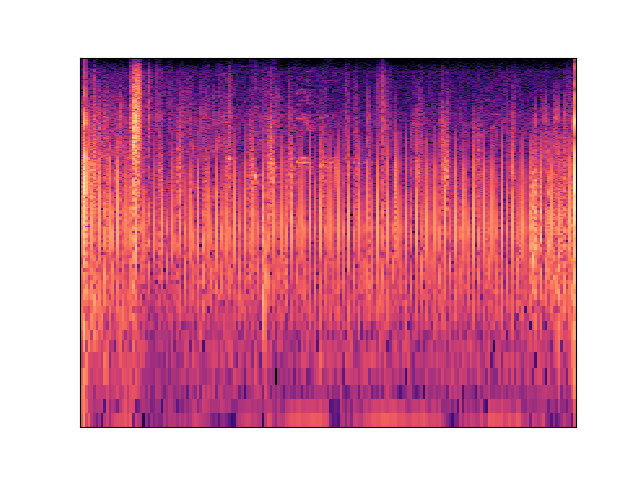

In [41]:
a

In [42]:

#Phonocardiogram == PCG
class pcg(data.Dataset):
    def __init__(self, files, classes, transforms=None): 
        # location of the dataset
        # self.root = root
        # list of files
        self.files = files
        # list of classes
        self.classes = classes
        # transforms
        self.transforms = transforms



    def __getitem__(self, item):
        # read the image
        
        image = create_spectrogram_image(self.files[item][0]).convert(mode="RGB")
        # image = im.convert(mode="RGB")
#         print(image)
        # class for that image
        class_ = self.classes[item]
        # apply transformation
        if self.transforms:
            image = self.transforms(image)
        # return the image and class
#         print(type(image), type(class_))
        return image, np.float32(class_)

    def __len__(self):
        # return the total number of images
        return len(self.files)

In [43]:
import torch
import torchvision

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 32 # We use a small batch size here for training
batch_size_test = 64 # We use bigger batch size for testing


# define how image transformed
# Augmentation and other can be done here too
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.Resize((224, 224))
                               ,
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.8197, 0.5639, 0.6587), (0.2404, 0.3792, 0.2873))   #we need to change mean and standard deviation-----------------------------------------
                                 ])

# image datasets
train_dataset = pcg(train_files, train_classes, 
                         transforms=image_transform)

test_dataset = pcg(test_files, test_classes, 
                        transforms=image_transform)

# data loaders
# train_loader = torch.utils.data.DataLoader(train_dataset,
#                                            batch_size=batch_size_train, 
#                                            shuffle=True, num_workers=2)
# test_loader = torch.utils.data.DataLoader(test_dataset,
#                                           batch_size=batch_size_test, 
#                                           shuffle=True, num_workers=2)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)


c:\Users\deepe\anaconda3\envs\healthcoursework\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [44]:
next(enumerate(train_loader))

(0,
 [tensor([[[[0.7500, 0.7500, 0.7500,  ..., 0.7500, 0.7500, 0.7500],
            [0.7500, 0.7500, 0.7500,  ..., 0.7500, 0.7500, 0.7500],
            [0.7500, 0.7500, 0.7500,  ..., 0.7500, 0.7500, 0.7500],
            ...,
            [0.7500, 0.7500, 0.7500,  ..., 0.7500, 0.7500, 0.7500],
            [0.7500, 0.7500, 0.7500,  ..., 0.7500, 0.7500, 0.7500],
            [0.7500, 0.7500, 0.7500,  ..., 0.7500, 0.7500, 0.7500]],
  
           [[1.1501, 1.1501, 1.1501,  ..., 1.1501, 1.1501, 1.1501],
            [1.1501, 1.1501, 1.1501,  ..., 1.1501, 1.1501, 1.1501],
            [1.1501, 1.1501, 1.1501,  ..., 1.1501, 1.1501, 1.1501],
            ...,
            [1.1501, 1.1501, 1.1501,  ..., 1.1501, 1.1501, 1.1501],
            [1.1501, 1.1501, 1.1501,  ..., 1.1501, 1.1501, 1.1501],
            [1.1501, 1.1501, 1.1501,  ..., 1.1501, 1.1501, 1.1501]],
  
           [[1.1880, 1.1880, 1.1880,  ..., 1.1880, 1.1880, 1.1880],
            [1.1880, 1.1880, 1.1880,  ..., 1.1880, 1.1880, 1.1880],
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


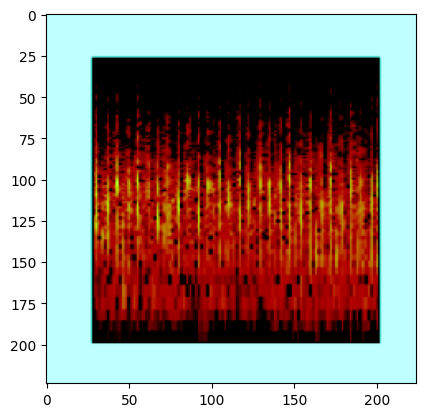

In [45]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(train_loader))
sample = example_datas[0]
# show the data
plt.imshow(sample.permute(1, 2, 0))
# print("Label: " + str(classes_str[labels[0]]))

In [46]:
### Need to corrrect lot of things 
### Now can use dataloader to create new images also
### use data loader modify accordingly and create CNN architecture for it


### Imported from AML Lab - 04
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from AlexNetModel1 import *


# define the model which contains pretrained weights from ImageNet
model = AlexNet4(3) # note the pretrained=True flag in the AlexNet4 model
# device: cuda (gpu) or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# map to device
model = model.to(device)
################################################################################
################################# IMPORTANT ####################################
################################################################################
# one can choose which parameters of the model to train or finetune
# Setting 1: make all the parameters of the model trainable
# for param in model.parameters():
#     param.requires_grad = True

# Setting 2: make only the last layer of the classifier handle trainable
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier[6].parameters():
    param.requires_grad = True

# Setting 3: make all the parameters of the conv layer (features handle) 
# not trainable and others (classifier handle) trainable
# for param in model.features.parameters():
#     param.requires_grad = False
# for param in model.classifier.parameters():
#     param.requires_grad = True

parameters = filter(lambda p: p.requires_grad, model.parameters())

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [48]:
device

device(type='cuda')

In [49]:
import torch.optim as optim


## create model and optimizer
learning_rate = 0.0001
weight_decay = 0.0005
# define optimizer
optimizer = optim.Adam(parameters, lr=learning_rate, weight_decay=weight_decay)

  0%|          | 0/79 [00:00<?, ?it/s]

train: Average loss: 0.2512, Accuracy: 12/2524 (37.50%)

train: Average loss: 0.3844, Accuracy: 125/2524 (35.51%)

train: Average loss: 0.3679, Accuracy: 234/2524 (34.82%)

train: Average loss: 0.3601, Accuracy: 363/2524 (36.59%)

train: Average loss: 0.3465, Accuracy: 467/2524 (35.59%)

train: Average loss: 0.3459, Accuracy: 569/2524 (34.87%)

train: Average loss: 0.3433, Accuracy: 688/2524 (35.25%)

train: Average loss: 0.3495, Accuracy: 791/2524 (34.82%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:200: UserWarning: Using a target size (torch.Size([28, 1])) that is different to the input size (torch.Size([28, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


Train: Average loss: 0.3495
, Accuracy: 885/2524 (35.06%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:260: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss
c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:260: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.3374, Accuracy: 411/631 (65.13%)

Classification report:
              precision    recall  f1-score   support

      Absent       0.82      0.78      0.80       497
     Present       0.15      0.26      0.19        70
     Unknown       0.14      0.08      0.10        64

    accuracy                           0.65       631
   macro avg       0.37      0.37      0.36       631
weighted avg       0.68      0.65      0.66       631

     0   1   2
0  388  84  25
1   46  18   6
2   39  20   5


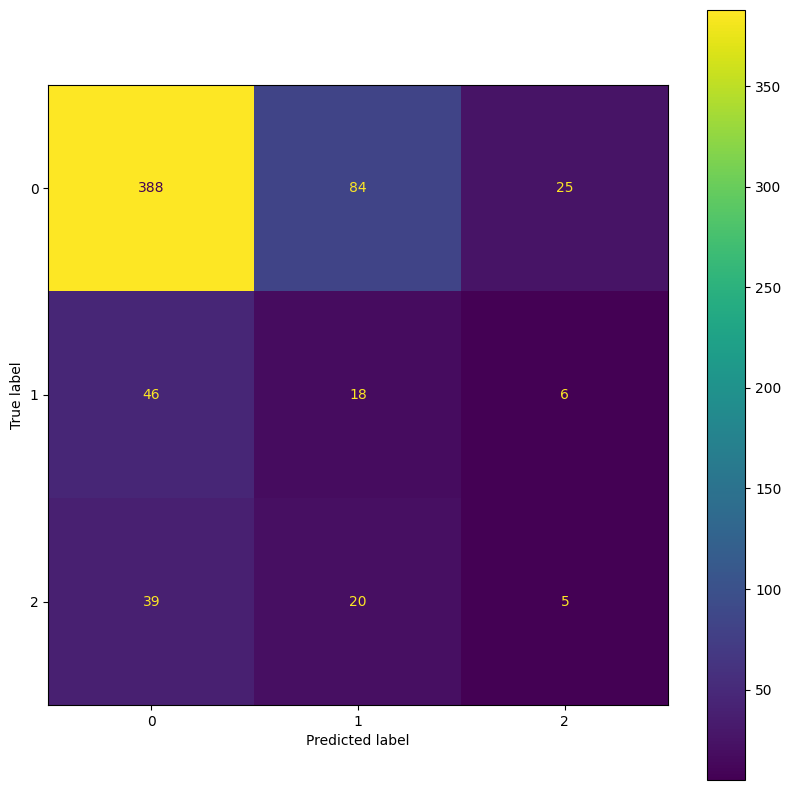

In [52]:
num_epoch = 1
for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer)
test(model, device, test_loader)

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

ModuleNotFoundError: No module named 'torchsummary'

In [ ]:
### Need to corrrect lot of things 
### Now can use dataloader to create new images also
### use data loader modify accordingly and create CNN architecture for it


### Imported from AML Lab - 04
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from AlexNetModel1 import *
from tvmodels import *

# define the model which contains pretrained weights from ImageNet
model = mobilenet_v3_small(num_classes = 1) # note the pretrained=True flag in the AlexNet4 model
# device: cuda (gpu) or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# map to device
model = model.to(device)
################################################################################
################################# IMPORTANT ####################################
################################################################################
# one can choose which parameters of the model to train or finetune
# Setting 1: make all the parameters of the model trainable
# for param in model.parameters():
#     param.requires_grad = True

# Setting 2: make only the last layer of the classifier handle trainable
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

# Setting 3: make all the parameters of the conv layer (features handle) 
# not trainable and others (classifier handle) trainable
# for param in model.features.parameters():
#     param.requires_grad = False
# for param in model.classifier.parameters():
#     param.requires_grad = True

parameters = filter(lambda p: p.requires_grad, model.parameters())

c:\Users\deepe\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\deepe\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.optim as optim


## create model and optimizer
learning_rate = 0.0001
weight_decay = 0.0005
# define optimizer
optimizer = optim.Adam(parameters, lr=learning_rate, weight_decay=weight_decay)

In [ ]:
num_epoch = 5
for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer)
test(model, device, test_loader)

jk
Test: Average loss: 0.5118, Accuracy: 24/2524 (75.00%)

jk
Test: Average loss: 0.4397, Accuracy: 53/2524 (82.81%)

jk
Test: Average loss: 0.4512, Accuracy: 78/2524 (81.25%)

jk
Test: Average loss: 0.4725, Accuracy: 103/2524 (80.47%)

jk
Test: Average loss: 0.5318, Accuracy: 124/2524 (77.50%)

jk
Test: Average loss: 0.5194, Accuracy: 149/2524 (77.60%)

jk
Test: Average loss: 0.5506, Accuracy: 172/2524 (76.79%)

jk
Test: Average loss: 0.5630, Accuracy: 195/2524 (76.17%)

jk
Test: Average loss: 0.6053, Accuracy: 216/2524 (75.00%)

jk
Test: Average loss: 0.6052, Accuracy: 236/2524 (73.75%)

jk
Test: Average loss: 0.6084, Accuracy: 260/2524 (73.86%)

jk
Test: Average loss: 0.5866, Accuracy: 286/2524 (74.48%)

jk
Test: Average loss: 0.5854, Accuracy: 310/2524 (74.52%)

jk
Test: Average loss: 0.5622, Accuracy: 336/2524 (75.00%)

jk
Test: Average loss: 0.5519, Accuracy: 360/2524 (75.00%)

jk
Test: Average loss: 0.5609, Accuracy: 382/2524 (74.61%)

jk
Test: Average loss: 0.5431, Accuracy: 40

c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:245: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 576])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.5101, Accuracy: 0/631 (0.00%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:245: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55, 576])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.3640, Accuracy: 49/631 (76.56%)

Classification report:
              precision    recall  f1-score   support

      Absent       1.00      0.77      0.87        64
     Present       0.00      0.00      0.00         0
     Unknown       0.00      0.00      0.00         0

    accuracy                           0.77        64
   macro avg       0.33      0.26      0.29        64
weighted avg       1.00      0.77      0.87        64

    0   1  2
0  49  12  3
1   0   0  0
2   0   0  0


c:\Users\deepe\anaconda3\envs\healthcoursework\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deepe\anaconda3\envs\healthcoursework\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deepe\anaconda3\envs\healthcoursework\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


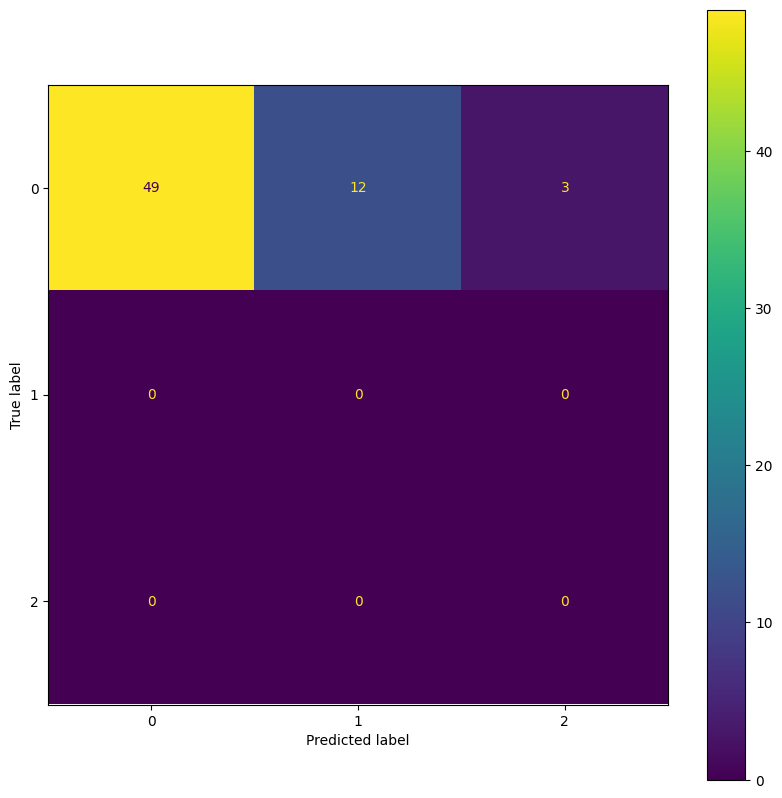

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
##define test function
# def test(model, device, test_loader):
    # meters
loss = AverageMeter()
acc = AverageMeter()
correct = 0
# switch to test mode
model.eval()
ground_truth = []
np_array = []
for data, target in test_loader:
    # after fetching the data transfer the model to the 
    # required device, in this example the device is gpu
    # transfer to gpu can also be done by 
    # data, target = data.cuda(), target.cuda()
    data, target = data.to(device), target.to(device)  # data, target = data.cuda(), target.cuda()
    # since we dont need to backpropagate loss in testing,
    # we dont keep the gradient
    with torch.no_grad():
        # compute the forward pass
        # it can also be achieved by model.forward(data)
        output = model(data)
    # compute the loss function just for checking
    loss_this = F.mse_loss(output, target) # sum up batch loss
    ground_truth.extend(np.argmax(output.to('cpu').numpy(),axis=-1))
    np_array.extend(arr_1(target.to('cpu').numpy().astype('int64')))
    # get the index of the max log-probability
    pred = output.argmax(dim=1, keepdim=True) 
    # check which of the predictions are correct
    correct_this = pred.eq(target.view_as(pred)).sum().item()
    # accumulate the correct ones
    correct += correct_this
    # compute accuracy
    acc_this = correct_this/target.shape[0]*100.0
    # update the loss and accuracy meter 
    acc.update(acc_this, target.shape[0])
    loss.update(loss_this.item(), target.shape[0])
    

    print('Test: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(loss.avg, correct, len(test_loader.dataset), acc.avg))
    
    print("Classification report:")
    # y_pred = model.predict(X_test)

    print(classification_report(ground_truth, np_array, labels=[0,1,2], target_names=['Absent', 'Present', 'Unknown']))
    # print("Test accuracy:",accuracy_score(target, output))

    labels = [0,1,2]
    
    matrix = confusion_matrix(ground_truth, np_array)
    print(pd.DataFrame(matrix,columns=labels, index=labels))
    fig, ax = plt.subplots(figsize=(10, 10))

    # plot the confusion matrix with labels
    cm_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)

    # plot the confusion matrix on the specified axes object
    cm_display.plot(ax=ax)
    plt.show()
    break

    



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [59]:
# print(i[0])

[1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0]

In [30]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,

In [56]:
### Need to corrrect lot of things 
### Now can use dataloader to create new images also
### use data loader modify accordingly and create CNN architecture for it


### Imported from AML Lab - 04
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from AlexNetModel1 import *

from resnet import *

# define the model which contains pretrained weights from ImageNet
model = resnet34(num_classes = 1) # note the pretrained=True flag in the AlexNet4 model
# device: cuda (gpu) or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# map to device
model = model.to(device)



################################################################################
################################# IMPORTANT ####################################
################################################################################
# one can choose which parameters of the model to train or finetune
# Setting 1: make all the parameters of the model trainable
# for param in model.parameters():
#     param.requires_grad = True

# Setting 2: make only the last layer of the classifier handle trainable
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

# Setting 3: make all the parameters of the conv layer (features handle) 
# not trainable and others (classifier handle) trainable
# for param in model.features.parameters():
#     param.requires_grad = False
# for param in model.classifier.parameters():
#     param.requires_grad = True

parameters = filter(lambda p: p.requires_grad, model.parameters())

Initialized model with pretrained weights from https://download.pytorch.org/models/resnet34-333f7ec4.pth


In [57]:
import torch.optim as optim


## create model and optimizer
learning_rate = 0.0001
weight_decay = 0.0005
# define optimizer
optimizer = optim.Adam(parameters, lr=learning_rate, weight_decay=weight_decay)

In [59]:
num_epoch = 0
for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer)
test(model, device, test_loader)

c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:224: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.9752, Accuracy: 0/631 (0.00%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\AlexNetModel1.py:224: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


In [60]:
for data, target in train_loader:
    print(model(data).shape)
    break

torch.Size([32, 512])
